# Homework 1

We begin by importing pandas and aliasing it. The dataset is read in as a csv and the extraneous columns are removed and the remaining ones, renamed.

In [63]:
import pandas as pd

donorsdf = pd.read_csv('donors_data.csv')

donorsdf.drop(donorsdf.columns[[0,1,12,13,14,18,22,23]], axis=1, inplace=True)

donorsdf.rename({'zipconvert_2': 'Reg1', 'zipconvert_3': 'Reg2', 'zipconvert_4': 'Reg3', 'zipconvert_5': 'Reg4', 'homeowner dummy': 'Homeowner', 'NUMCHLD': 'Num_Chld', 'INCOME': 'Income', 'gender dummy': 'Sex', 'WEALTH': 'Wealth_Rat', 'HV': 'Home_Val', 'NUMPROM': 'Lt_Promotions', 'RAMNTALL': 'Lt_Gifts', 'MAXRAMNT': 'Max_Gift', 'LASTGIFT': 'Last_Gift', 'totalmonths': 'Months_Last_Don', 'TIMELAG': 'Time_Btwn_Gifts', 'AVGGIFT': 'Avg_Gifts'}, axis=1, inplace=True)

Checking the types of each columns to asssess analysis capabilities

In [12]:
donorsdf.dtypes

Reg1                 int64
Reg2                 int64
Reg3                 int64
Reg4                 int64
Homeowner            int64
Num_Chld             int64
Income               int64
Sex                  int64
Wealth_Rat           int64
Home_Val             int64
Lt_Promotions        int64
Lt_Gifts           float64
Max_Gift           float64
Months_Last_Don      int64
Time_Btwn_Gifts      int64
Avg_Gifts          float64
dtype: object

Checking for nulls and nas to see if rows need to be removed and values substituted.

In [13]:
print(donorsdf.isna().sum())

Reg1               0
Reg2               0
Reg3               0
Reg4               0
Homeowner          0
Num_Chld           0
Income             0
Sex                0
Wealth_Rat         0
Home_Val           0
Lt_Promotions      0
Lt_Gifts           0
Max_Gift           0
Months_Last_Don    0
Time_Btwn_Gifts    0
Avg_Gifts          0
dtype: int64


In [15]:
print(donorsdf.isnull().sum())

Reg1               0
Reg2               0
Reg3               0
Reg4               0
Homeowner          0
Num_Chld           0
Income             0
Sex                0
Wealth_Rat         0
Home_Val           0
Lt_Promotions      0
Lt_Gifts           0
Max_Gift           0
Months_Last_Don    0
Time_Btwn_Gifts    0
Avg_Gifts          0
dtype: int64


Check the shape of the data and get a visual understanding

In [65]:
donorsdf.shape

(3120, 16)

In [20]:
donorsdf

,Reg1,Reg2,Reg3,Reg4,Homeowner,Num_Chld,Income,Sex,Wealth_Rat,Home_Val,Lt_Promotions,Lt_Gifts,Max_Gift,Months_Last_Don,Time_Btwn_Gifts,Avg_Gifts
0,0,1,0,0,1,1,5,1,9,1399,74,102.0,6.0,29,3,4.857143
1,1,0,0,0,1,1,1,0,7,698,46,94.0,12.0,34,6,9.400000
2,0,0,0,1,0,2,5,1,8,828,32,30.0,10.0,29,7,4.285714
3,0,0,0,1,1,1,3,0,4,1471,94,177.0,10.0,30,3,7.080000
4,0,1,0,0,1,1,4,0,8,547,20,23.0,11.0,30,6,7.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,0,0,0,1,1,1,4,0,8,697,23,30.0,16.0,29,5,7.500000
3116,0,1,0,0,0,1,2,0,8,590,29,53.0,30.0,37,9,26.500000
3117,0,0,0,1,1,1,3,0,7,3129,79,212.0,20.0,36,3,11.157895
3118,0,0,0,1,1,1,7,1,8,1345,27,60.0,20.0,31,9,20.000000


EDA prior to pursing question 1. Examing what the average wealth rating looks like for men and women.

In [21]:
donorsdf.groupby('Sex').Wealth_Rat.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
0,1219.0,6.500410,2.399841,0.0,5.0,8.0,8.0,9.0
1,1901.0,6.339295,2.624596,0.0,5.0,8.0,8.0,9.0


In [23]:
donorsdf.groupby('Sex').Wealth_Rat.mean()

Sex
0    6.500410
1    6.339295
Name: Wealth_Rat, dtype: float64

Create a variable that will contain the data frame for the output of the question we're answering.

In [94]:
q1 = donorsdf.groupby(['Sex', 'Wealth_Rat'], as_index=False)['Lt_Gifts'].sum()

Experiment with unhelpful plots and matplotlib

In [95]:
%matplotlib inline

In [96]:
from matplotlib import pyplot as plt

<AxesSubplot:>

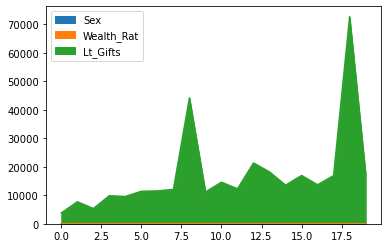

In [105]:
q1.plot(kind='area')

Create a file to write the output to. Save the csv to this file and then read the file and take a look at it visually.

In [91]:
QOne_Rpt = open('donors_q1_rpt.csv', 'w')

q1_rpt = q1.to_csv('donors_q1_rpt.csv', index=False)

q1_rpt_read = pd.read_csv('donors_q1_rpt.csv')

In [90]:
q1_rpt_read

,Wealth_Rat,Sex,Lt_Gifts
0,0,0,3795.75
1,0,1,14600.94
2,1,0,7730.80
3,1,1,12273.57
4,2,0,5352.02
5,2,1,21358.91
6,3,0,9862.50
7,3,1,18185.00
8,4,0,9575.25
9,4,1,13562.00


Perform the same steps on question 2.

In [106]:
q2 = donorsdf.groupby(['Income', 'Sex'], as_index=False)['Time_Btwn_Gifts'].mean()

In [107]:
%matplotlib inline

Create a useful plot showing that income increases the time between donations for men and women reamins pretty consisent.

<AxesSubplot:>

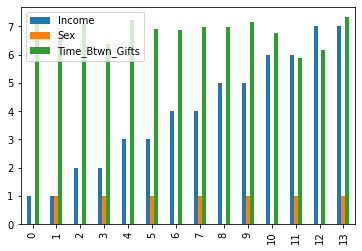

In [108]:
q2.plot(kind='bar')

Repeate the file creation process used to answer question 1

In [109]:
Q2_Rpt = open('donors_q2_rpt.csv', 'w')

q2_rpt = q2.to_csv('donors_q2_rpt.csv', index=False)

q2_rpt_read = pd.read_csv('donors_q2_rpt.csv')

In [110]:
q2_rpt_read

,Income,Sex,Time_Btwn_Gifts
0,1,0,7.242991
1,1,1,6.645714
2,2,0,7.064706
3,2,1,6.389262
4,3,0,7.217742
5,3,1,6.895349
6,4,0,6.882199
7,4,1,6.977645
8,5,0,6.990741
9,5,1,7.153605
